In [1]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  gtfs_importer
from quetzal.model import stepmodel
% matplotlib inline

In [2]:
training_folder = '../../'

In [3]:
sm = stepmodel.read_zip(training_folder + r'model/preparation/road_model.zip')
#sm = stepmodel.read_hdf(training_folder + 'model/merged_after.hdf')

read_hdf: : 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 15.46it/s]


# clustering

In [4]:
sm.preparation_clusterize_nodes(500)

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 50003.62it/s]


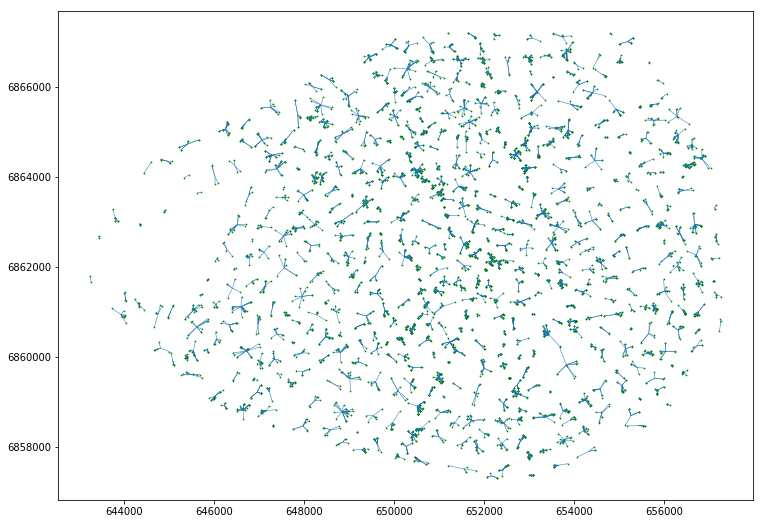

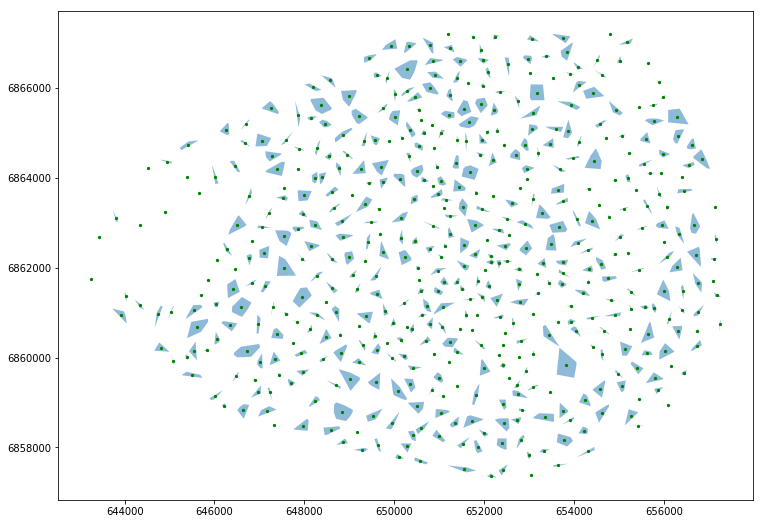

In [5]:
plot = sm.plot('node_parenthood', linewidth=0.5,
               ax=sm.plot('disaggregated_nodes', figsize=[16, 9], markersize=0.5, color='green'))
plot = sm.plot('nodes', color='green', markersize=5,
               ax=sm.plot('node_clusters', figsize=[16, 9], alpha=0.5))

# walkmodel

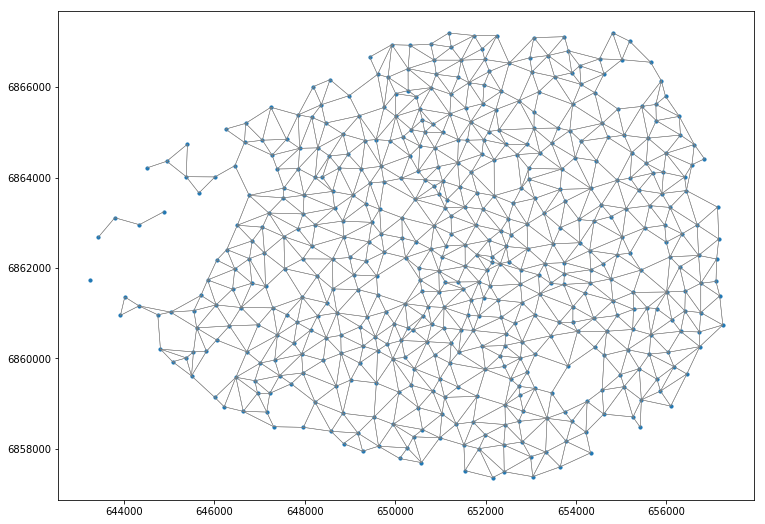

In [6]:
sm.preparation_footpaths(max_length=800)
plot = sm.plot(
    'footpaths', color='grey', linewidth=0.5,
    ax=sm.plot('nodes', markersize=10, figsize=[16, 9] )
)

In [7]:
threshold = 200
sm.preparation_ntlegs(
    short_leg_speed=3,
    long_leg_speed=10,
    threshold=threshold,
    zone_to_transit=True,
    zone_to_road=True
)

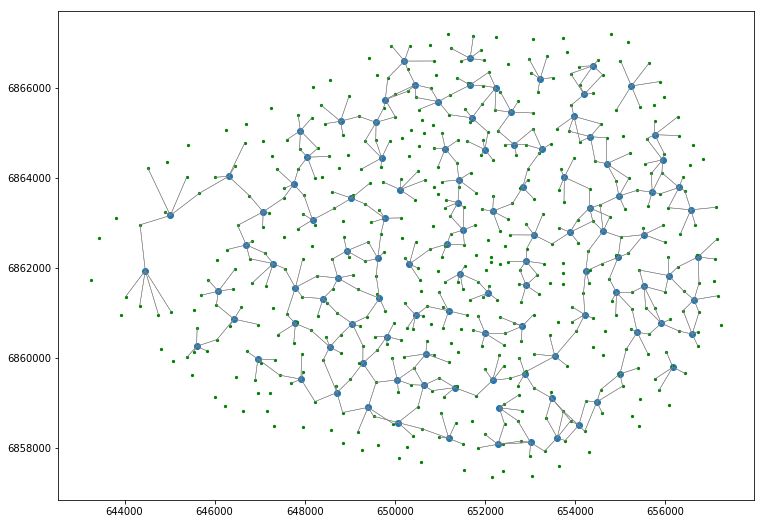

In [8]:
plot = sm.plot(
    'zone_to_transit', color='grey', linewidth=0.5,
    ax=sm.plot('nodes', color='green', markersize=5,
        ax=sm.plot('centroids', figsize=[16, 9])
    )
)

In [9]:
sm.to_zip(training_folder + 'model/preparation/walk_model.zip')  

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 30/30 [00:03<00:00,  8.84it/s]


In [10]:
projected = sm.change_epsg(epsg=4326, coordinates_unit='degree')
projected.to_json(
    training_folder + 'model/latest', 
    save_jsons=False
 
)  

Reprojecting model from epsg 2154 to epsg 4326: 100%|██████████████████████████████████| 30/30 [00:04<00:00,  6.99it/s]


TypeError: to_json() got an unexpected keyword argument 'save_jsons'

# zone_to_transit monitoring

In [ ]:
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='time')
ax.axvline(x=threshold)
ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='speed')